<a href="https://colab.research.google.com/github/manthilaw/Python-Projects/blob/main/6_2_Introduction_to_Data_Visualization_with_Matplotlib_Plotting_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 6.2 Plotting time-series
Time series data is data that is recorded. Visualizing this type of data helps clarify trends and illuminates relationships between data.


In [7]:
# Mount Google Drive to Collaboratory

from google.colab import drive
drive.mount('/content/gdrive')


# Mount Google Drive to Collaboratory

path = ('/content/gdrive/MyDrive/DataCamp CSV/8.Introduction to Data Visualization with Matplotlib/climate_change.csv')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 6.2.1 Read data with a time index
pandas DataFrame objects can have an index that denotes time. This is useful because Matplotlib recognizes that these measurements represent time and labels the values on the axis accordingly.

In this exercise, you will read data from a CSV file called climate_change.csv that contains measurements of CO2 levels and temperatures made on the 6th of every month from 1958 until 2016. You will use pandas' read_csv function.

To designate the index as a DateTimeIndex, you will use the parse_dates and index_col key-word arguments both to parse this column as a variable that contains dates and also to designate it as the index for this DataFrame.

By the way, if you haven't downloaded it already, check out the Matplotlib Cheat Sheet. It includes an overview of the most important concepts, functions and methods and might come in handy if you ever need a quick refresher!

* Import the pandas library as pd.
* Read in the data from a CSV file called 'climate_change.csv' using pd.read_csv.
* Use the parse_dates key-word argument to parse the "date" column as dates.
* Use the index_col key-word argument to set the "date" column as the index.

In [8]:
# Import Pandas

import pandas as pd

# Read CSV file

climate_change = pd.read_csv(path,parse_dates=['date'],index_col = ['date'])

climate_change.head()

,co2,relative_temp
date,,
1958-03-06,315.71,0.10
1958-04-06,317.45,0.01
1958-05-06,317.50,0.08
1958-06-06,NaN,-0.05
1958-07-06,315.86,0.06


# 6.2.2 Plot time-series data
To plot time-series data, we use the Axes object plot command. The first argument to this method are the values for the x-axis and the second argument are the values for the y-axis.

This exercise provides data stored in a DataFrame called climate_change. This variable has a time-index with the dates of measurements and two data columns: "co2" and "relative_temp".

In this case, the index of the DataFrame would be used as the x-axis values and we will plot the values stored in the "relative_temp" column as the y-axis values. We will also properly label the x-axis and y-axis.

* Add the data from climate_change to the plot: use the DataFrame index for the * x value and the "relative_temp" column for the y values.
* Set the x-axis label to 'Time'.
* Set the y-axis label to 'Relative temperature (Celsius)'.
Show the figure.



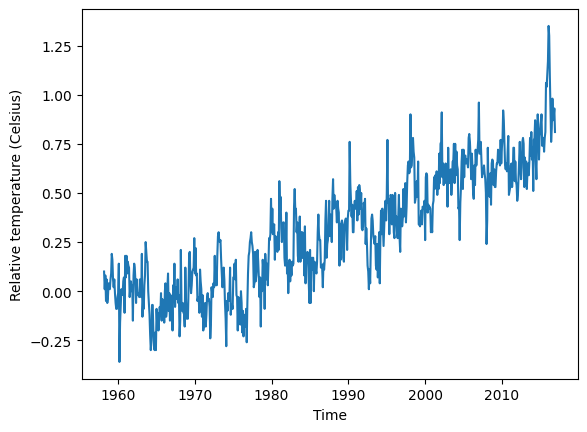

In [9]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# Add the time-series for "relative_temp" to the plot
ax.plot(climate_change.index,climate_change['relative_temp'])

# Set the x-axis label
ax.set_xlabel("Time")

# Set the y-axis label
ax.set_ylabel("Relative temperature (Celsius)")

# Show the figure
plt.show()


## 6.2.3 Using a time index to zoom in
When a time-series is represented with a time index, we can use this index for the x-axis when plotting. We can also select a range of dates to zoom in on a particular period within the time-series using pandas' indexing facilities. In this exercise, you will select a portion of a time-series dataset and you will plot that period.

The data to use is stored in a DataFrame called climate_change, which has a time-index with dates of measurements and two data columns: "co2" and "relative_temp".

* Use plt.subplots to create a Figure with one Axes called fig and ax, respectively.
* Create a variable called seventies that includes all the data between "1970-01-01" and "1979-12-31".
* Add the data from seventies to the plot: use the DataFrame index for the x value and the "co2" column for the y values.

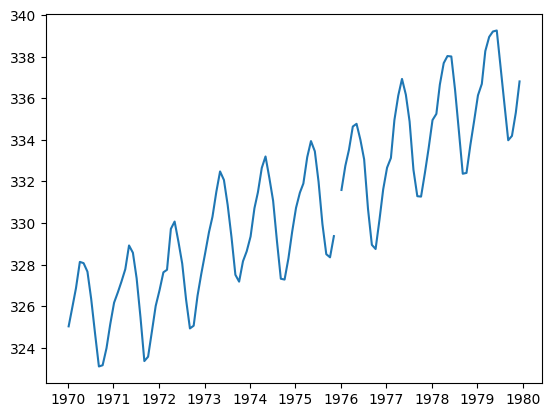

In [10]:
# Use plt.subplots to create fig and ax

fig, ax = plt.subplots()

# Create variable seventies with data from "1970-01-01" to "1979-12-31"

seventies = climate_change['1970-01-01':'1979-12-31']

# Add the time-series for "co2" data from seventies to the plot

ax.plot(seventies.index,seventies['co2'])

# Show the figure
plt.show()



## 6.2.3 Plotting two variables
If you want to plot two time-series variables that were recorded at the same times, you can add both of them to the same subplot.

If the variables have very different scales, you'll want to make sure that you plot them in different twin Axes objects. These objects can share one axis (for example, the time, or x-axis) while not sharing the other (the y-axis).

To create a twin Axes object that shares the x-axis, we use the twinx method.

In this exercise, you'll have access to a DataFrame that has the climate_change data loaded into it. This DataFrame was loaded with the "date" column set as a DateTimeIndex, and it has a column called "co2" with carbon dioxide measurements and a column called "relative_temp" with temperature measurements.

* Use plt.subplots to create a Figure and Axes objects called fig and ax, respectively.
* Plot the carbon dioxide variable in blue using the Axes plot method.
Use the Axes twinx method to create a twin Axes that shares the x-axis.
* Plot the relative temperature variable in red on the twin Axes using its plot method.

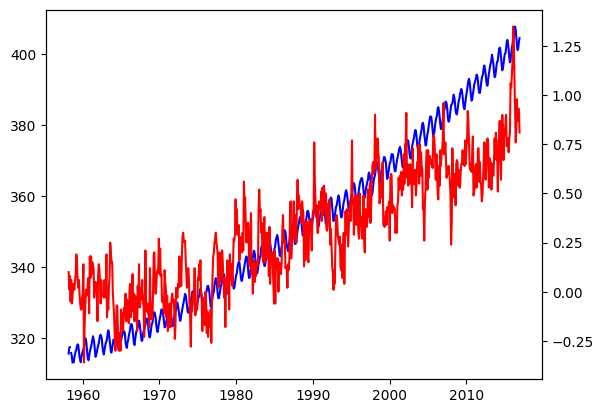

In [14]:
# Initalize a Figure and Axes
fig, ax = plt.subplots()

# Plot the CO2 variable in blue
ax.plot(climate_change.index,climate_change['co2'],color = 'b')

# Create a twin Axes that shares the x-axis
ax2=ax.twinx()

# Plot the relative temperature in red
ax2.plot(climate_change.index,climate_change['relative_temp'],color='r')

plt.show()


# 6.2.4 Defining a function that plots time-series data
Once you realize that a particular section of code that you have written is useful, it is a good idea to define a function that saves that section of code for you, rather than copying it to other parts of your program where you would like to use this code.

Here, we will define a function that takes inputs such as a time variable and some other variable and plots them as x and y inputs. Then, it sets the labels on the x- and y-axis and sets the colors of the y-axis label, the y-axis ticks and the tick labels.

* Define a function called plot_timeseries that takes as input an Axes object (axes), data (x,y), a string with the name of a color and strings for x- and y-axis labels.
* Plot y as a function of in the color provided as the input color.
Set the x- and y-axis labels using the provided input xlabel and ylabel, setting the y-axis label color using color.
* Set the y-axis tick parameters using the tick_params method of the Axes object, setting the colors key-word to color.

In [ ]:
# Define a function called plot_timeseries
def plot_timeseries(axes,x,y,color,x_label,y_label):

# Plot the inputs x,y in the provided color


# Set the x-axis label


# Set the y-axis label

# Set the colors tick params for y-axis
